In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.optimizers import Adam
from keras.applications import InceptionV3
from keras.applications import ResNet50

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [ ]:
img = image.load_img('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg')

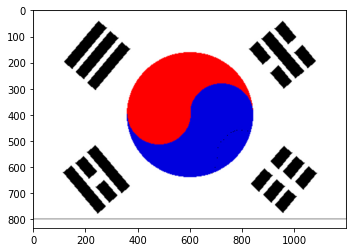

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/MyDrive/datasets/flag/train/korean flag/000001 (2).jpg').shape

(833, 1200, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
val =ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/train/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

val_dataset = train.flow_from_directory('/content/drive/MyDrive/datasets/flag/val/',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          shuffle=True,
                                          class_mode='binary')

Found 1013 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'korean flag': 0, 'no korean flag': 1}

## model1 CNN

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation='relu'),

                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
])

## model2 resnet50

In [ ]:
res50 = ResNet50(include_top=True, weights='imagenet')

for layer in res50.layers:
    layer.trainable=False

In [ ]:
x = res50.output # param num= 2048
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

prediction = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model2 = tf.keras.Model(res50.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)

## model 3  Inceptionv3

In [ ]:
Inceptionv3 = InceptionV3(include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
from keras import layers
import keras

In [ ]:

x = Inceptionv3.output # param num= 2048
x = layers.GlobalAveragePooling2D()(x)
x = Inceptionv3.output # param num= 2048
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='elu')(x)
x = layers.BatchNormalization()(x)

prediction = layers.Dense(1, activation='sigmoid')(x)

model3 =keras.Model(Inceptionv3.input, prediction) # model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model3.compile(loss= tf.keras.losses.BinaryCrossentropy() , optimizer= keras.optimizers.Nadam(lr=0.001), metrics=['accuracy'])

In [ ]:
model_fit = model3.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs= 50,
                      validation_data = val_dataset)

Epoch 1/50
10/20 [==============>...............] - ETA: 1:45 - loss: 1.8752 - accuracy: 0.6472

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 294s 15s/step - loss: 1.1512 - accuracy: 0.7615 - val_loss: 1.9858 - val_accuracy: 0.6948
Epoch 2/50
20/20 [==============================] - 90s 4s/step - loss: 0.3091 - accuracy: 0.8855 - val_loss: 26.1510 - val_accuracy: 0.6948
Epoch 3/50
20/20 [==============================] - 36s 2s/step - loss: 0.2519 - accuracy: 0.8983 - val_loss: 60.7862 - val_accuracy: 0.6948
Epoch 4/50
20/20 [==============================] - 21s 1s/step - loss: 0.1213 - accuracy: 0.9650 - val_loss: 5.4771 - val_accuracy: 0.6948
Epoch 5/50
20/20 [==============================] - 15s 757ms/step - loss: 0.1208 - accuracy: 0.9650 - val_loss: 0.9750 - val_accuracy: 0.7597
Epoch 6/50
20/20 [==============================] - 14s 722ms/step - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.5113 - val_accuracy: 0.8442
Epoch 7/50
20/20 [==============================] - 13s 669ms/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.4381 - val_accuracy: 0.8701
Epoch 8/50
20/20 [

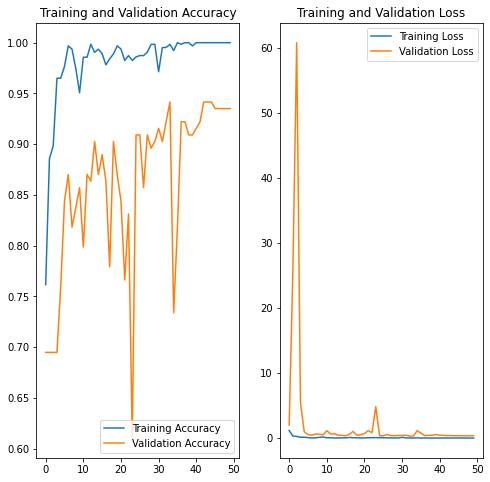

In [ ]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

32768/28451 [==================================] - 0s 0us/step
[[6.5255967e-06]]
태극기입니다


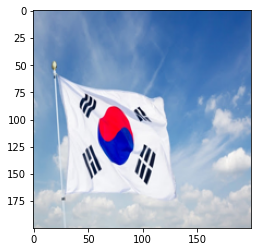

In [ ]:
file_path = tf.keras.utils.get_file('test7','https://lh3.googleusercontent.com/proxy/5SGLhDg_PHF5Hl52tU68svjEXVr6EXNwTN0UvDWX9qXyTcX_N4HG9Q3TFc1mHB9Yf5EkpZlisFpq8viIKoUndB6MM6-wy9AV_idcToBIHL9gYMQP') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred = model3.predict(x_test)
print(pred)
if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')

32768/29163 [=================================] - 0s 5us/step
[[1.]]
태극기가 아닙니다


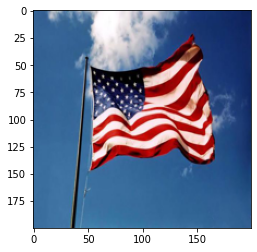

In [ ]:
file_path = tf.keras.utils.get_file('test8','https://t1.daumcdn.net/cfile/tistory/230A724B54AF769F13') # 2번째 항에 웹에서 이미지 주소 붙이기
image = Image.open(file_path).convert('RGB')
image = image.resize((200,200))
image = np.array(image) 

image = image.reshape((200,200,3))
plt.imshow(image)
x_test = [image]
x_test = np.array(x_test)
x_test = x_test / 255

pred = model3.predict(x_test)
print(pred)
if pred < 0.5:
    print('태극기입니다')

else:
    print('태극기가 아닙니다')